In [1]:
# Import libraries 
import pandas  as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("Reading the csv file and looking at the first five rows :\n")

score= pd.read_csv("student_scores.csv")
score.head()

Reading the csv file and looking at the first five rows :



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
score.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
print(score.shape)

(25, 2)


In [5]:
print("Students score Info :\n")

score.info()

Students score Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Figure size 720x720 with 0 Axes>

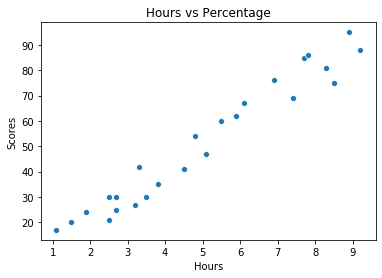

In [7]:
plt.figure(figsize=(10,10))

plt.show()
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
sns.scatterplot(y='Scores',x='Hours',data =score)

In the above graph , we can see that there is a positive linear relation between the number of hours studied and percentage of score.

In [8]:
##To extract the attributes and labels:

X = score.iloc[:, :-1].values
y = score.iloc[:, 1].values

In [9]:
### split this data into training and test sets :

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
### Training the Algorithm
print ("Training the Algorithm:")
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


Training the Algorithm:


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# For the intercept
print(regressor.intercept_)

2.018160041434683


In [12]:
### For  the slope (coefficient of x):

print(regressor.coef_)


[9.91065648]


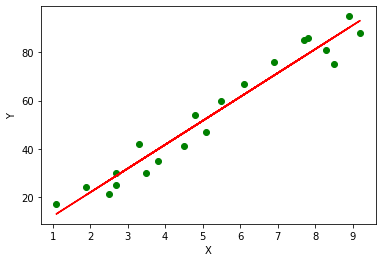

In [13]:
# Visualising the Training set results : Using formula
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train,  color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
#To make predictions on the test data

print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#To compare the actual output values for X_test with the predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
###Test with own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [17]:
#### Evaluating the Algorithm
from sklearn import metrics
from sklearn.metrics import  r2_score

#The coefficient of determination: 1 is perfect prediction(r2)

print('Coefficient of determination(r2): ', r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Coefficient of determination(r2):  0.9454906892105356
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
